In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('data/house.csv')

In [3]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df1.shape

(2226382, 12)

In [5]:
df1.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


Veri setindeki ev büyüklüğü ayak kare cinsinden ve arazi büyüklüğü akre cinsinden gösterilir, bu ikisi ifadeler değerleri metre kare'ye dönüştürülür

In [7]:
df1.loc[:, 'house_size'] = df1['house_size'] * 0.09

In [8]:
df1.loc[:, 'acre_lot'] = df1['acre_lot'] * 4046.86

In [9]:
df1.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

acente bilgileri, ev durumu ve önceki satış tarihi önemsiz bilgileri olduğu için veri kümesinden kaldırdım

In [10]:
df1.drop(['brokered_by', 'status', 'prev_sold_date'], axis=1, inplace=True)

Veri setinde evin ve arsanın büyüklüğü gibi çok önemli eksik bilgiler bulunmakta ve birçok örneğin özelliklerinin yarısı eksiktir. Modelli yanlış bilgilerden etkilenmesini önlemek için, ev ve arasanın büyüklüğü bilgiler eksik olan örnekleri kaldıracağız.

In [11]:
df1.dropna(subset=['price', 'state', 'house_size', 'acre_lot'], axis=0, inplace=True)

In [12]:
df1.shape

(1381351, 9)

In [13]:
df1.isnull().sum()

price             0
bed           14617
bath          17696
acre_lot          0
street         4150
city            335
state             0
zip_code         96
house_size        0
dtype: int64

Eksik sokak değerleri için, öncelikle veri setini il ve şehre göre düzenlememiz gerekir, ardından eksik bilgiler önceki sokak değerleriyle doldurulacaktır çünkü önceki veriler aynı il ve şehre sahip olacaktır.

In [14]:
df1 = df1.sort_values(by=['state', 'city'])

In [15]:
df1.loc[:, 'street'] = df1['street'].ffill()
df1.loc[:, 'city'] = df1['city'].ffill()
df1.loc[:, 'zip_code'] = df1['zip_code'].ffill()

In [16]:
df1.isnull().sum()

price             0
bed           14617
bath          17696
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
dtype: int64

Bu veri setinde bazı yanlış değerler ve aykırı değerler var, bunların kaldırılması model performansını ve tahminini iyileştirecektir

In [17]:
df2 = df1[~((df1['price'] <= 0) | (df1['house_size'] <= 0))]

Ev büyüklüğünden daha küçük arazi büyüklüğüne sahip verilerin kaldırılması (daireler gibi emlak dahil değildir)

In [18]:
df3 = df2[~((df2['acre_lot'] < df2['house_size']) & (df2['acre_lot'] != 0))]

Yatakların ve banyoların evin kendisinden daha büyük olduğunu gösteren verilerin kaldırılması

In [19]:
df4 = df3[~(df3['bed'] * 1.62 + df3['bath'] * 3.33 > df3['house_size'])]

Metrekare fiyatı çok küçük veya çok büyük olan evler kaldırılıyor

In [20]:
price_per_squared_meter = df4['price'] / df4['house_size']
df5 = df4[~((price_per_squared_meter < 110) | (price_per_squared_meter > 110000))]

Eksik yatak ve banyo bulunan veriler, ev büyüklüğüne göre en fazla bulunan değerle doldurulacaktır

In [21]:
big_house_bed = df5[df5['house_size'] > 900]['bed'].mode()[0]
big_house_bath = df5[df5['house_size'] > 900]['bath'].mode()[0]

average_bed = df5['bed'].mode()[0]
average_bath = df5['bath'].mode()[0]

In [22]:
def fill_bed(house_size):
    if house_size > 900:
        return big_house_bed
    else:
        return average_bed

In [23]:
def fill_bath(house_size):
    if house_size > 900:
        return big_house_bath
    else:
        return average_bath

In [24]:
df5.loc[:, 'bed'] = df5.apply(
    lambda df5_row: fill_bed(df5_row['house_size']) if pd.isnull(df5_row['bed']) else df5_row['bed'], axis=1)
df5.loc[:, 'bath'] = df5.apply(
    lambda df5_row: fill_bath(df5_row['house_size']) if pd.isnull(df5_row['bath']) else df5_row['bath'], axis=1)

il ve şehir değerleri dizedir ve problemimiz bir regresyon problemi olduğundan tüm veri kümesi değerleri sayısal olmalıdır, bu nedenle il ve şehir her değer için ortalama fiyatla değiştirilecektir.

In [25]:
df6 = df5.copy()
state_average_price = df6.groupby('state')['price'].mean()
df6.loc[:, 'state_average_price'] = df6['state'].map(state_average_price)

In [26]:
city_average_price = df6.groupby(['state', 'city'])['price'].mean()
df6['city_average_price'] = df6.apply(lambda df6_row: city_average_price.loc[df6_row['state'], df6_row['city']], axis=1)

Veri setinden il ve şehir dize değerlerini kaldıracağız

In [27]:
df6.drop(['state', 'city'], axis=1, inplace=True)

In [28]:
df7 = df6.drop_duplicates()

bu ısı haritası her özellik kombinasyonu için veri korelasyon değerini gösterir, değer ne kadar yüksekse bir özellik diğer bir özellik ile o kadar fazla korelasyona sahiptir

<Axes: >

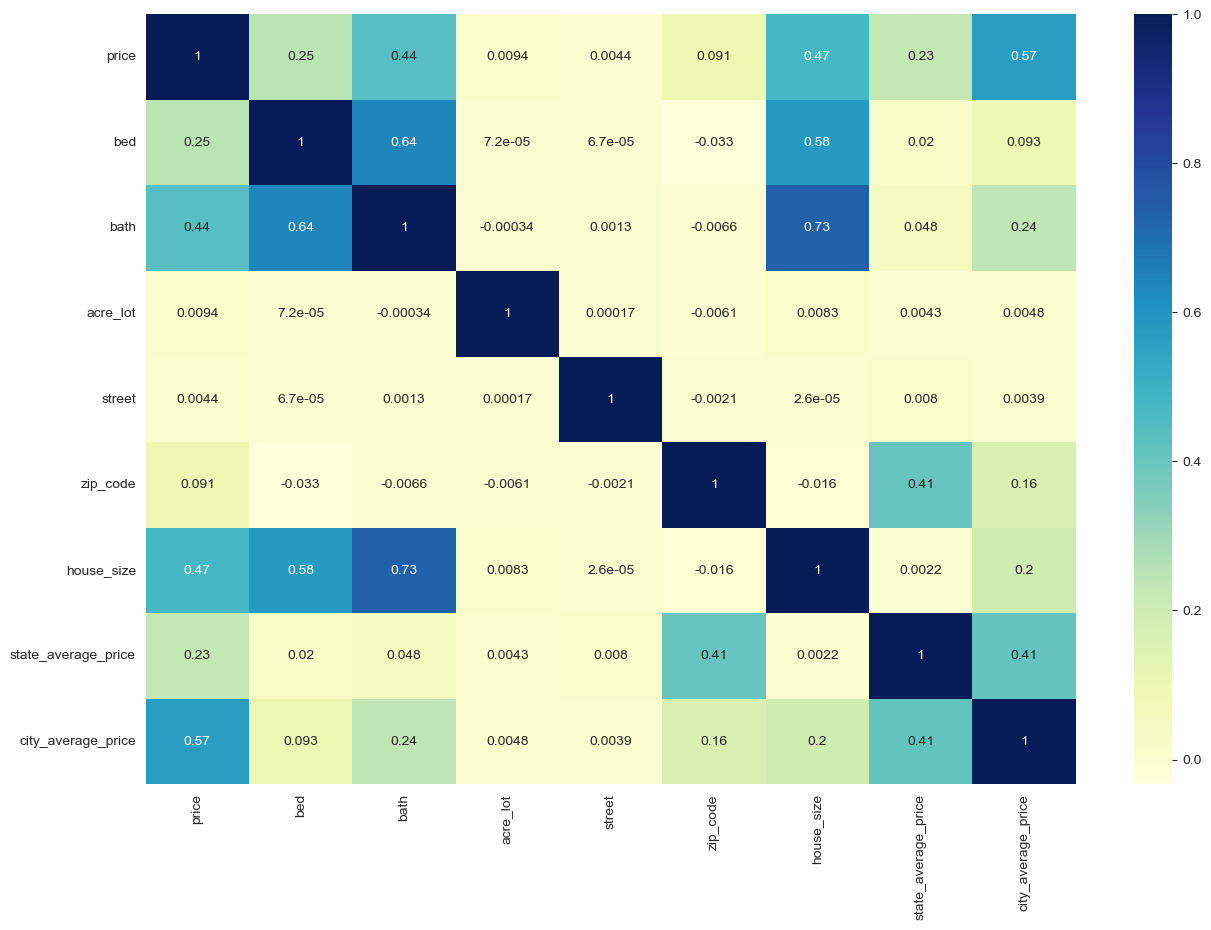

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(df7.corr(), annot=True, cmap="YlGnBu")

bu her özellik için bir histogram oluşturur

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

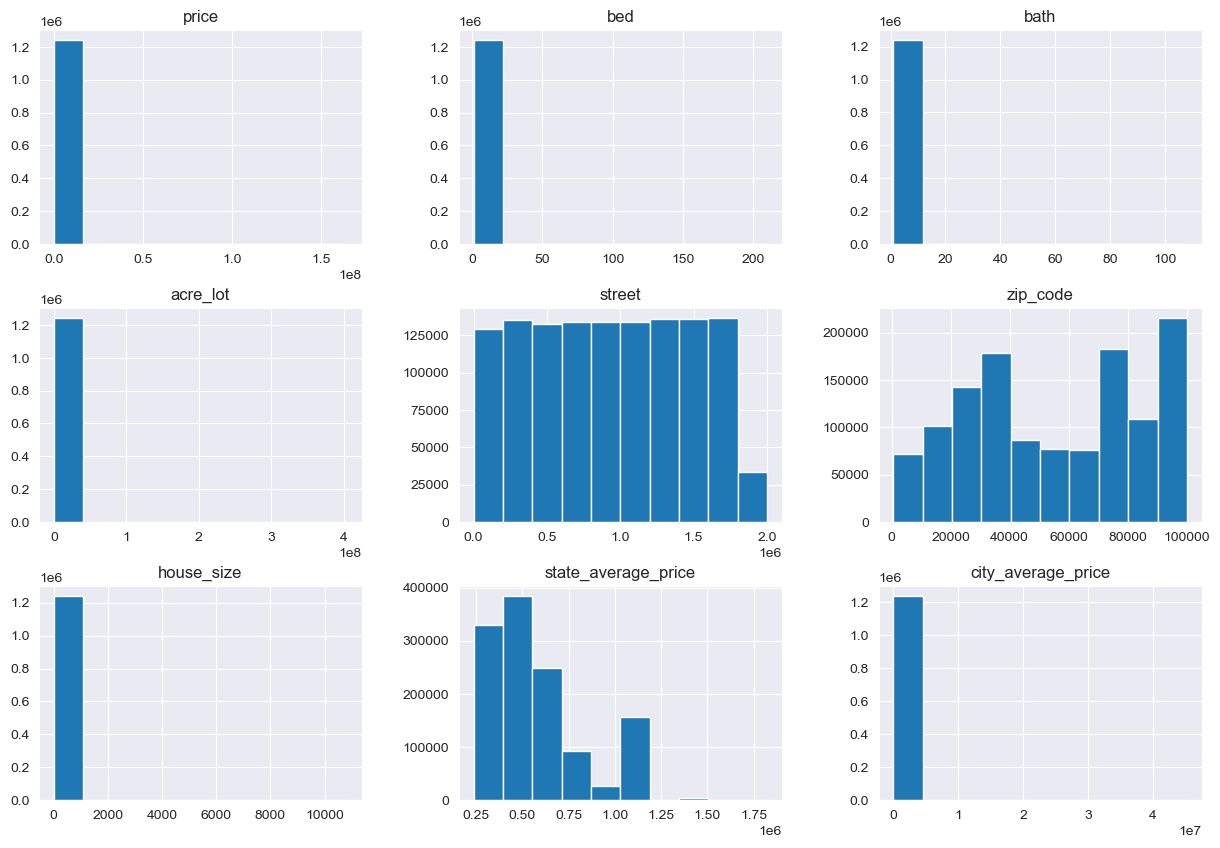

In [30]:
df7.hist(figsize=(15, 10))

Dağılımı daha simetrik ve normale yakın hale getirmek için logaritmik dönüşümü kullanacağız.

In [31]:
df8 = df7.copy()

df8['price'] = np.log(df8['price'] + 1)
df8['house_size'] = np.log(df8['house_size'] + 1)
df8['acre_lot'] = np.log(df8['acre_lot'] + 1)
df8['city_average_price'] = np.log(df8['city_average_price'] + 1)
df8['state_average_price'] = np.log(df8['state_average_price'] + 1)
df8['bath'] = np.log(df8['bath'] + 1)
df8['bed'] = np.log(df8['bed'] + 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'street'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'state_average_price'}>,
        <Axes: title={'center': 'city_average_price'}>]], dtype=object)

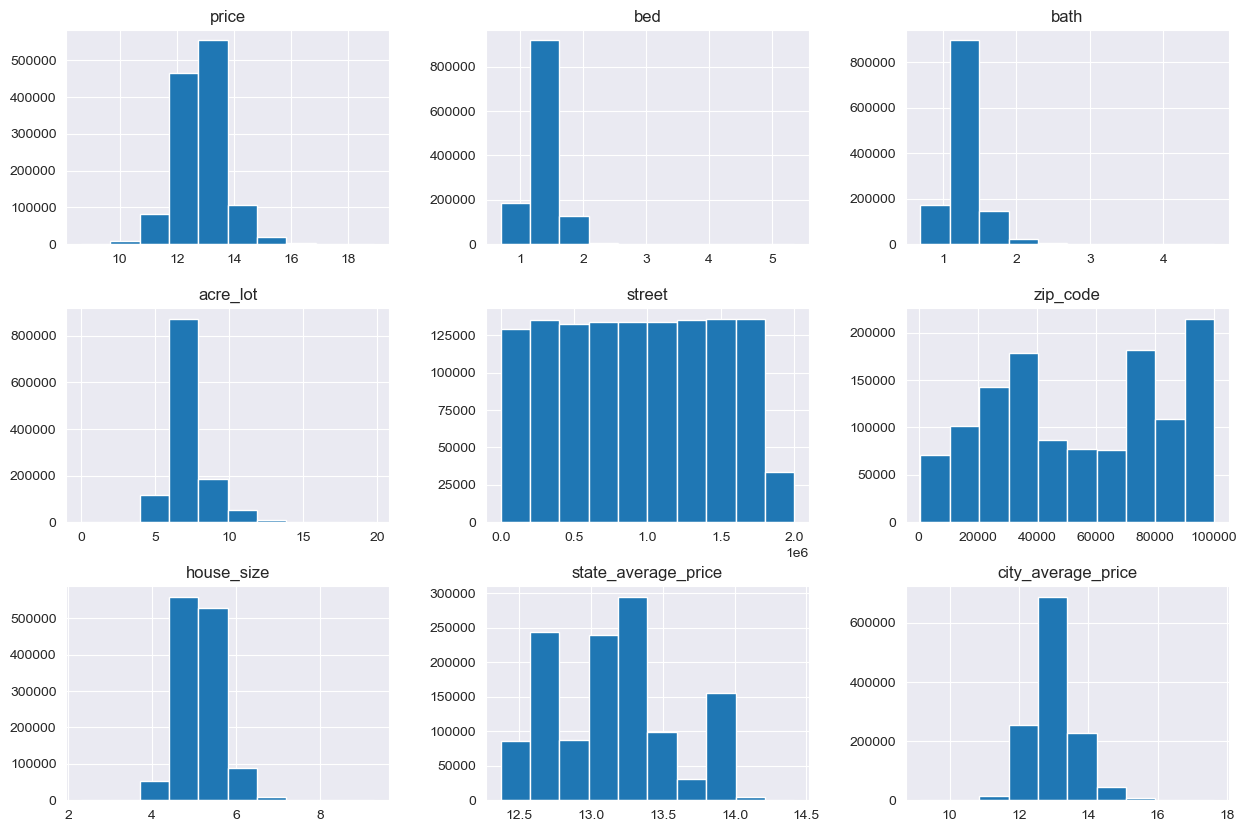

In [32]:
df8.hist(figsize=(15, 10))

In [33]:
df8.to_csv('data/preprocessed_data.csv', index=False)